In [146]:
import numpy as np
import pandas as pd

#model selection, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#tensor flow model selection
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

##### Load the dataset

In [122]:
df = pd.read_csv('/Users/tinonturjamajumder/Downloads/laptop_price - dataset.csv' , encoding = 'latin-1')

#split the dataset into dependant variable and independant variable
X = df.drop(columns = ['Price (Euro)'])
y = df['Price (Euro)']

#convert 1-D arrays into 2-D because the commands later will require it

y=np.expand_dims(y, axis = 1)
print(f"the shape of the inputs x is: {X.shape} and dimension {X.ndim}")
print(f"the shape of the targets y is: {y.shape} and dimension {y.ndim}")

the shape of the inputs x is: (1275, 14) and dimension 2
the shape of the targets y is: (1275, 1) and dimension 2


In [123]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


##### Split the dataset

In [124]:
X_train, x_, y_train, y_=train_test_split(X, y, random_state=16, test_size=0.4)

print(f"The shape of Train data set : {X_train.shape}")
print(f"The shape of Train target data set : {y_train.shape}")

#split the remaining dataset equally into train and cross validation dataset
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, random_state=16, test_size=0.5)
print(f"The shape of Test data set : {x_test.shape}")
print(f"The shape of Test data target set : {y_test.shape}")
print(f"The shape of cross validation data set : {x_cv.shape}")
print(f"The shape of cross validation target data set : {y_cv.shape}")

The shape of Train data set : (765, 14)
The shape of Train target data set : (765, 1)
The shape of Test data set : (255, 14)
The shape of Test data target set : (255, 1)
The shape of cross validation data set : (255, 14)
The shape of cross validation target data set : (255, 1)


##### NUmeric dataset seperation

In [125]:
numeric_features = X_train.select_dtypes(include=['number']).columns
numeric_features_cv= x_cv.select_dtypes(include=['number']).columns

#now only take the numeric dataset to scale
X_train_numeric = X_train[numeric_features]
x_cv_numeric = x_cv[numeric_features_cv]


In [126]:
#scale the dataset
scale_linear = StandardScaler()
x_train_scaled = scale_linear.fit_transform(X_train_numeric)

#now got the scaled model 
#train the model
linear_model = LinearRegression()
linear_model.fit(x_train_scaled,y_train)

#predict
yhat= linear_model.predict(x_train_scaled)

#use scikit learn utility function and divite it by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat)/2}")



training MSE (using sklearn function): 103489.68394597336


##### Train the cross validation set

In [127]:
#scale the dataset
x_cv_scaled = scale_linear.transform(x_cv_numeric)

#now got the scaled model 
#train the model
linear_model = LinearRegression()
linear_model.fit(x_cv_scaled,y_cv)

#predict
yhat= linear_model.predict(x_cv_scaled)

#use scikit learn utility function and divite it by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_cv, yhat)/2}")



training MSE (using sklearn function): 77487.1231712146


##### Adding polynomial features

In [128]:
train_mses = []
cv_mses = []

for degree in range(1,11):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_numeric)
    x_cv_poly = poly.transform(x_cv_numeric)
    #scale the data
    scale_linear = StandardScaler()
    x_train_scaled_final = scale_linear.fit_transform(X_train_poly)
    x_cv_scaled_final = scale_linear.transform(x_cv_poly)
    #call the model
    linear_model = LinearRegression()

    #train the model
    linear_model.fit(x_train_scaled_final,y_train)

    #predict the model
    yhat = linear_model.predict(x_train_scaled_final)
    yhat_cv = linear_model.predict(x_cv_scaled_final)
    #cost calculation
    train_mse = mean_squared_error(y_train, yhat)/2
    cv_mse = mean_squared_error(y_cv, yhat_cv)/2

    train_mses.append(train_mse)
    cv_mses.append(cv_mse)

    print(f"Degree: {degree}, Train_MSE: {train_mse:.4f}, CV_MSE: {cv_mse:.4f}")

    

Degree: 1, Train_MSE: 103489.6839, CV_MSE: 81496.1450
Degree: 2, Train_MSE: 82298.3878, CV_MSE: 80615.9395
Degree: 3, Train_MSE: 66195.2575, CV_MSE: 74310.7949
Degree: 4, Train_MSE: 56850.3004, CV_MSE: 390940.0940
Degree: 5, Train_MSE: 45057.3119, CV_MSE: 881461.2061
Degree: 6, Train_MSE: 36446.6984, CV_MSE: 163257117.9031
Degree: 7, Train_MSE: 28557.5342, CV_MSE: 10817140715879647232.0000
Degree: 8, Train_MSE: 21580.4316, CV_MSE: 6291558919854277632.0000
Degree: 9, Train_MSE: 17279.5598, CV_MSE: 29928841040291071787008.0000
Degree: 10, Train_MSE: 17095.8869, CV_MSE: 163943988053766257508352.0000


In [129]:
degree = np.argmin(cv_mses)+1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=3


##### Work with the Test Data Set

In [130]:
# Fit PolynomialFeatures on the training data
polis = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
X_train_poly = polis.fit_transform(X_train_numeric)  # Fit and transform on training data

# Transform the cross-validation and test data using the same fitted polynomial transformation
x_cv_poly = polis.transform(x_cv_numeric)
x_test_mapped = polis.transform(x_test_numeric)

# Scale the data
scale_linear = StandardScaler()
x_train_scaled_final = scale_linear.fit_transform(X_train_poly)
x_cv_scaled_final = scale_linear.transform(x_cv_poly)
x_test_mapped_scaled = scale_linear.transform(x_test_mapped)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train_scaled_final, y_train)

# Predict the test set
yhat = linear_model.predict(x_test_mapped_scaled)

# Compute the Test MSE
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Test MSE: {test_mse:.2f}")


Test MSE: 78443.95


## Neural Networks

##### Add polynomial Features

In [131]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
x_train_mapped = poly.fit_transform(X_train_numeric)
x_cv_mapped = poly.transform(x_cv_numeric)
x_test_mapped = poly.transform(x_test_numeric)

##### Scale the features using Z-score

In [132]:
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
X_cv_mapped_scaled = scaler.transform(x_cv_mapped)
X_test_mapped_scaled = scaler.transform(x_test_mapped)

### Build and train the models

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [134]:
def build_models():
    tf.random.set_seed(16)
    model_1 = Sequential (
        [
            Dense(25, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(1, activation = 'linear')
        ], name= 'model_1'
    )
    model_2 = Sequential (
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )
    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

    

In [135]:
#initialize lists that will contain the errors for each model 
nn_train_mses = []
nn_cv_mses = []

#build the models
nn_models = build_models()

for model in nn_models:
    #model1
    #model2
    #model3


    #set up the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.01), 
    )

    print(f" Training {model.name}...")



    #Train the model
    model.fit (
        X_train_mapped_scaled , y_train, 
        epochs = 300, 
        verbose = 0
    )

    print("Done!\n")

    #record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train,yhat)/2
    nn_train_mses.append(train_mse)


    #record the cross validation MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat)/2
    nn_cv_mses.append(cv_mse)



    #print results
print('Results:')
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]: .2f}," +
        f" CV MSE: {nn_cv_mses[model_num]: .2f}"
    )

 Training model_1...
Done!

8/8 [==============================] - 0s 318us/step
 Training model_2...
Done!

8/8 [==============================] - 0s 341us/step
 Training model_3...
Done!

8/8 [==============================] - 0s 359us/step
Results:
Model 1: Training MSE:  77097.20, CV MSE:  66952.85
Model 2: Training MSE:  78810.40, CV MSE:  76852.33
Model 3: Training MSE:  79085.15, CV MSE:  71681.95


In [136]:
#select the model with the lowest CV MSE
model_num = 3
#compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

8/8 [==============================] - 0s 889us/step
Selected Model: 3
Training MSE: 79085.15
Cross Validation MSE: 71681.95
Test MSE: 87031.74


## Classification

In [137]:
#import the necessities
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import tensorflow as tf


### Load the dataset

In [138]:
data = np.loadtxt('/Users/tinonturjamajumder/Machine learning Specialization /Advanced Learning Algorithm /week 3/Files/home/jovyan/work/data/data_w3_ex2.csv', delimiter = ',')

#split the inputs and outputs into separate arrays
x_bc = data[:, :-1] #all rows and all columns except the final column
y_bc = data[:, -1] #all rows and only the last column

#convert y into 2_D
y_bc = np.expand_dims(y_bc, axis=1)
print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


#### visualize the dataset

In [139]:
def plot_dataset(x, y, title):
    for i in range(len(y)):
        marker = 'x' if y[i] == 1 else 'o'
        c = 'r' if y[i] == 1 else 'b'
        plt.scatter(x[i,0], x[i,1], marker = marker, c=c);
    plt.title('x1 vs x2')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    

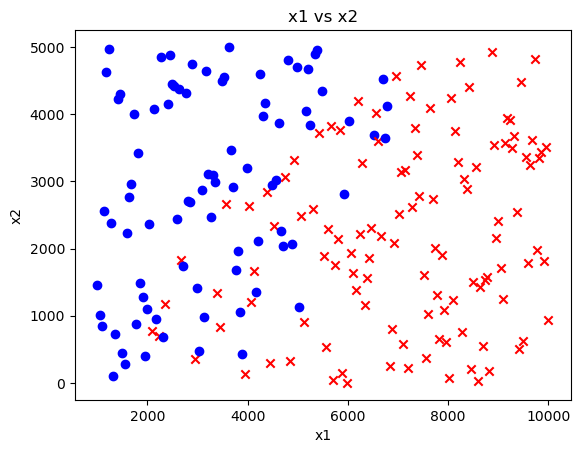

In [140]:
plot_dataset(x=x_bc, y=y_bc , title = 'x1 vs. x2')

#### Split the dataset

In [141]:
x_bc_train , x_, y_bc_train, y_ = train_test_split(x_bc,y_bc, random_state=16, test_size=0.4)

#now split the test data set equally into test and cross validation dataset
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_,y_, random_state=16, test_size=0.5)

#delete the intermediate variable
del x_,y_


print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [142]:
#scale the features

#initialize the class
scaler_linear = StandardScaler()

#compute the mean and std of the training set 
x_bc_train_scaled= scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

##### Evaluating the error for classification models

In [143]:
#sample model output
probabilities = np.array ([ 0.2, 0.6,0.7,0.3,0.8])

#apply a threshold to the model output. If greater than 0.5 set to 1. Else 0
predictions = np.where(probabilities >= 0.5,1, 0)

#ground truth labels
ground_truth = np.array([1,1,1,1,1])

#initialize counter for misclassified data
misclassified = 0

#get number of predicitons
num_predictions = len(predictions)

#get number of predictions
for i in range(num_predictions):

    #check if it matches the ground truth
    if predictions[i] != ground_truth[i]:

        #add one to the counter if the prediction is wrong
        misclassified +=1
#compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [144]:
#initialize lists that will contain error for each model
nn_train_error = []
nn_cv_error = []

#build the models
model_bc = build_models()

for model in model_bc:


    #error and loss
    model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}")


    #train the model
    model.fit(
        x_bc_train_scaled,y_bc_train,
        epochs = 200, 
        verbose = 0
    )
    print("Done!\n")


    #set the threshold for classification
    threshold = 0.5

    #record the fraction of misclassified examples for the training 
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    #record the fraction of misclassified examples for the cross validation
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)


#print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1
Done!

2/2 [==============================] - 0s 852us/step
Training model_2
Done!

2/2 [==============================] - 0s 959us/step
Training model_3
Done!

2/2 [==============================] - 0s 665us/step
Model 1: Training Set Classification Error: 0.08333, CV Set Classification Error: 0.12500
Model 2: Training Set Classification Error: 0.07500, CV Set Classification Error: 0.10000
Model 3: Training Set Classification Error: 0.04167, CV Set Classification Error: 0.17500


In [145]:
#select the model with lowest error
model_num = 3

#compute the test error
yhat = model_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 842us/step
Selected Model: 3
Training Set Classification Error: 0.0417
CV Set Classification Error: 0.1750
Test Set Classification Error: 0.1750
